In [1]:
#from matplotlib.pyplot import * 
#from numpy import *
import pynested_fit as pynf
import os

%matplotlib inline
#%matplotlib widget
#%matplotlib notebook

In [2]:
# Define the present path
path = os.getcwd()

In [3]:
# Choose one of them
path = path+'/res_3gauss_bg'

In [6]:
os.chdir(path)

In [7]:
pwd

'/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/examples/jupyter_notebooks/res_3gauss_bg'

In [11]:
# Run nested

conf = pynf.Configurator(
    datafiles=['he-histo.dat'],
    filefmt='.tsv',
    specstr='x,c',
    livepoints=1000,
    expressions=['QUAD_GAUSS_BG'],
    params={
        'b_g': {'value': 0.01, 'step': -1, 'min': 0, 'max': 0.3 , 'npar': 1},
        
        'x_1': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 , 'npar': 2},
        'x_2': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 , 'npar': 3},
        'x_3': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 , 'npar': 4},
        'x_4': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 , 'npar': 5},
        
        'A_1': {'value': 300, 'step': -1, 'min': 0, 'max': 500 , 'npar': 6},
        'A_2': {'value': 300, 'step': -1, 'min': 0, 'max': 500 , 'npar': 7},
        'A_3': {'value': 300, 'step': -1, 'min': 0, 'max': 500 , 'npar': 8},
        'A_4': {'value': 300, 'step': -1, 'min': 0, 'max': 500 , 'npar': 9},
        
          's': {'value': 20, 'step': -1, 'min': 10, 'max': 30 ,  'npar': 10},
    },
    data={'xmin': 250, 'xmax': 650}
)
conf.sample(silent_output=False) # Not working on mac for the moment
os.chdir('..')

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:26                                                                                   │
│                                                                                                  │
│   23 │   },                                                                                      │
│   24 │   data={'xmin': 250, 'xmax': 650}                                                         │
│   25 )                                                                                           │
│ ❱ 26 conf.sample(silent_output=False)                                                            │
│   27 os.chdir('..')                                                                              │
│   28                                                                                             │
│                                                                                                  │
│ /Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_run.py:566 │
│ in sample                                                                                        │
│                                                                                                  │
│   563 │   │   )                                                                                  │
│   564 │   │                                                                                      │
│   565 │   │   if not silent_output:                                                              │
│ ❱ 566 │   │   │   self._generate_live_dashboard()                                                │
│   567 │   │   │                                                                                  │
│   568 │   │   │   with RLive(self._live_dash, refresh_per_second=20):                            │
│   569 │   │   │   │   while self._nf_process.poll() is None:                                     │
│                                                                                                  │
│ /Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_run.py:691 │
│ in _generate_live_dashboard                                                                      │
│                                                                                                  │
│   688 │   │   header_panel = RPanel(self._header, title='Nested Fit Dashboard')                  │
│   689 │   │   self._input_info = NFDashboardInput(self)                                          │
│   690 │   │   input_panel = RPanel(self._input_info, title='Input Info')                         │
│ ❱ 691 │   │   self._output_info = NFDashboardOutput(self)                                        │
│   692 │   │   output_panel = RPanel(self._output_info, title='Output Info')                      │
│   693 │   │   self._live_dash['header'].update(header_panel)                                     │
│   694 │   │   self._live_dash['body']['input_info'].update(input_panel)                          │
│                                                                                                  │
│ /Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_run.py:251 │
│ in __init__                                                                                      │
│                                                                                                  │
│   248 │   │   self._layout['bot'].update(self._plot)                                             │
│   249 │   │                                                                                      │
│   250 │   │   # NOTE: (César) If this is a set run, currently we just display the first (funct   │
│ ❱ 251 │   │   self._evaluator = NFEvaluator(config.get_functions_expr()[0].split('=')[0].split   │
│   252 │   │   self._local_extents = config.get_extents()[0]

In [25]:
# Load the nested output data
# The available parameters and other variables that can be plotted are listed
an=pynf.Analysis(path=path)

Current path =  /home/prime/repos/nested_fit/examples/jupyter_notebooks_TD/res_3gauss_bg
Available parameters : ['weight', 'lnlikelihood', 'A_1', 'A_2', 'A_3', 'A_4', 'b_g', 's', 'x_1', 'x_2', 'x_3', 'x_4']


0 max
nf_output_data_max.dat


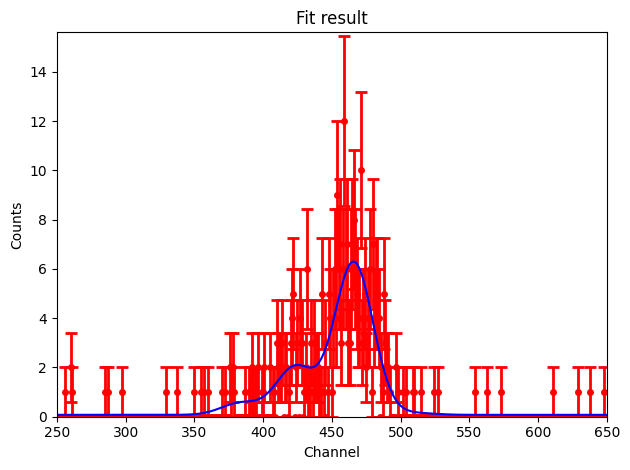

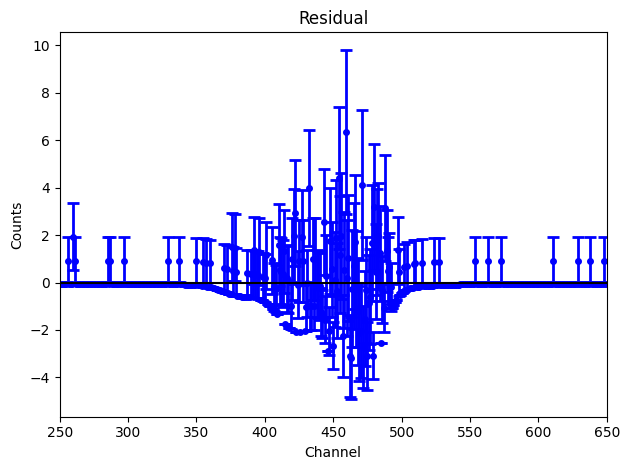

In [26]:
# Plot the data with the best fit (parameters corresponding to the maximum value of the data) and residual
# Other choices are median and mean parameters values selectable with "typeof='mean'" and "typeof='median'"
an.plot(path=path)

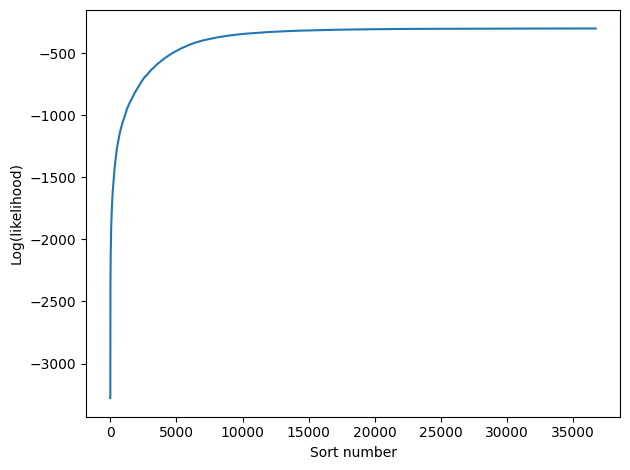

In [27]:
# Plot the likelihood sampling 
an.plot_like()

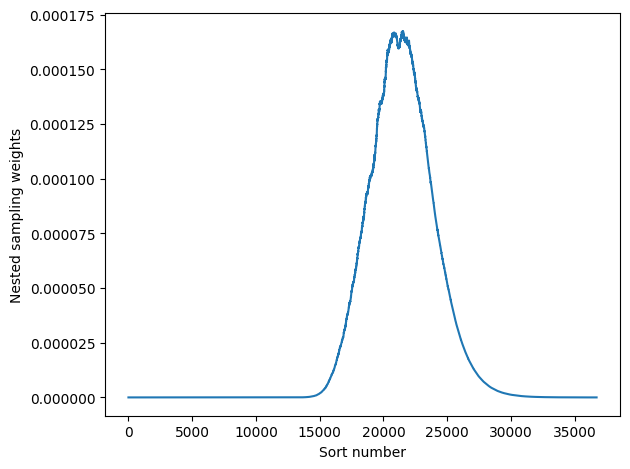

In [28]:
# Plot the weights of nested sampling corresponding to w_n = Delta X_n L_n
an.plot_weights()

Set par_number A_2 to 3


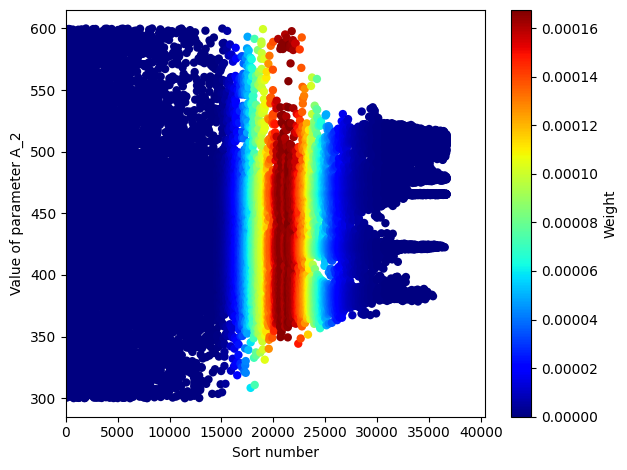

In [32]:
# Plot the parameter convergence
# Colored regions correspond to the high value of the weights
an.plot_par('A_2')

Set par_number A_2 to 3


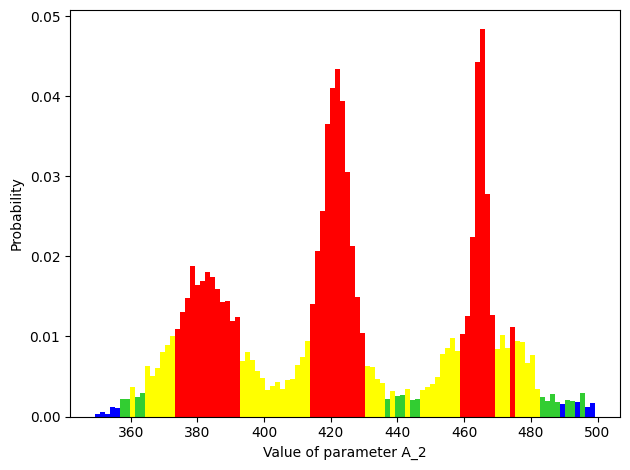

In [33]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo('A_2',bins=100,xmin=350,xmax=500)

In [35]:
# Plot one parameter interpolated histogram using getdist
an.histo_interp('A_2',path=path)

In [36]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo2D('A_2','x_2',bins=200,xmin=350,xmax=500,ymin=0,ymax=300)

Set par_number A_2 to 3
Set par_number x_2 to 9


/home/prime/repos/nested_fit/pynested_fit/nested_res.py:1178: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data68[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb68)
/home/prime/repos/nested_fit/pynested_fit/nested_res.py:1179: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data95[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb95)
/home/prime/repos/nested_fit/pynested_fit/nested_res.py:1180: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data99[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb99)
/home/prime/repos/nested_fit/pynested_fit/nested_res.py:1181: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data_rest[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb_rest)


In [37]:
# Same with interpolation from getdist
an.histo2D_interp('A_2','x_2',path=path)

/home/prime/repos/nested_fit/pynested_fit/nested_res.py:1375: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [38]:
# Triangle plot (from anesthetic) to have a look to all parameters at the same time
an.triangle_plot(['x01','x02','amp1','amp2'],path=path)

In [39]:
# Statistics (from anesthetic) to have a good estimation of the uncertainties (expecially for the evidence)
an.stats(path=path)

logZ 	 = -326.642033 	± 0.149645
D_KL 	 = 19.157193 	± 0.138660
logL_P 	 = -307.484840 	± 0.064969
d_G 	 = 11.631758 	± 0.291358
